# Transforming vectors and graphics

In this chapter we'll see how to draw objects that change over time. We'll do so by chaining together sequences of small transformations, that when rendered very quickly (a few dozens every second), will create the illusion of continuous motion.

As an example, we wrote a `rotate` function that took in a 2D vector and rotate it by a given angle in the counterclockwise direction. We can think of that function as a transformation of that sort.

![Rotate as a transformation](pics/rotate_transformation.png)

We'll see that the same concept can be applied to every vector of a 3D shaphe to rotate it:

![Rotate 3D shape](pics/rotate_3d_shape.png)

We'll introduce a broad class of vector transformations called *linear transformations* that send vectors lying on a straight line to new vectors that also lie on a straight line.

To visualize rotations, linear transformations, and other vector transformations we'll need to change our drawing backend to something a bit more powerful than our good old Matplotlib chart library that has served us well in the previous chapters.

We'll swap Matplotlib for OpenGL and its Python wrapper **PyOpenGL**. For handling user interactivity and facilitate animations we'll use a game development library called **PyGame**.

## Setting up shop

Before running any of the 3D projects or Jupyter notebooks based on OpenGL and PyGame you will need to install the required libraries.

### OS Prerequisites (WSL2 - Ubuntu 20.04.6 LTS)

You need to install OpenGL Utility Toolkit ([FreeGLUT](https://freeglut.sourceforge.net/)) in your WSL2:

```bash
sudo apt install freeglut3-dev
```

While not strictly required, [PyOpenGL installation documentation](https://pyopengl.sourceforge.net/documentation/installation.html) suggests that GLE is also needed:

```bash
sudo apt install libgle3-dev
```



### Installing the 3D Backend Virtual Environment

For running the 3D examples as Python programs it is recommended to create a virtual environment with the following dependencies:

```
matplotlib==3.8.0
pygame==2.5.2
PyOpenGL==3.1.7
PyOpenGL-accelerate==3.1.7
vec2d==0.1.1
vec3d==0.1.0
```



### Creating the 3D Backend `conda` Environment

For running the 3D examples from the Jupyter cells, it is recommended to create a conda environment. 

Note however that the results will be displayed in their own OS Windows and not in Jupyter cells.

Follow these steps to create the conda environment:

```bash
# Search for the latest stable Python
$ conda search "^python$"
python                        3.11.4      h7a1cb2a_0  pkgs/main
python                        3.11.4      h955ad1f_0  pkgs/main
python                        3.11.5      h7a1cb2a_0  pkgs/main
python                        3.11.5      h955ad1f_0  pkgs/main
python                        3.12.0      h996f2a0_0  pkgs/main

# Create new environment based on Python 3.11.5 (3.12.0 is too new)
$ conda create --name gl3d python=3.11.5

# Activate the newly created conda environment
$ conda activate gl3d

# Install pygame and matplotlib
$ conda install -c conda-forge pygame
$ conda install -c conda-forge matplotlib

# Install the remaining deps
$ python -m pip install pyopengl
$ python -m pip install pyopengl-accelerate
$ python -m pip install vec2d
$ python -m pip install vec3d
```

### Project Shakedown

To validate that your installation is running as expected you can run [06: Octahedron using OpenGL/Pygame](../../02_mini-projects/06-octahedron-opengl-pygame/), [07: Draw Utah Teapot](../../02_mini-projects/07-draw-teapot/), and [08: RenderGL Lib example](../../02_mini-projects/08-rendergl/).

You will have to install the corresponding requirements in each case.

Please note when quiting the corresponding examples you'll get a "Segmentation Fault". That does not affect the project while executing.

| NOTE: |
| :---- |
| You might need to adjust the location of the `teapot.off` file. |

### Jupyter Shakedown

To validate that the conda environment works as expected you will need to:

1. Select the `gl3d` kernel for your Jupyter notebook.
2. Create a symbolic link to the `rendergl` library: `ln -s ../../02_mini-projects/08-rendergl/rendergl rendergl`
3. Execute the following cell checking that the Utah Teapot is displayed in its own OS window (not as a Jupyter cell)

In [2]:
from rendergl import draw_model, load_triangles

draw_model(load_triangles())

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

### An Introduction to out `rendergl` library

The `rendergl` library is a compilation of the different support functions to accomplish all of the 3D exercises of this chapter.

The library's essential functions are:

+ `draw_model()` &mdash; used to draw 3D shapes on screen. You will need to pass the *faces* as the first argument. All the other arguments are optional.

+ `load_triangles()` &mdash; a function that reads the Utah Teapot 3D model file and returns a collection of faces that can be passed as the first argument to `draw_model`.

+ `polygon_map()` &mdash; a convenience function that can be used to transform a collection of faces given a certain transformation. For example, you can use it to rotate all the faces of the teapot about the x-axis by 30° by doing `polygon_map(rotate_x_by(pi / 6), load_triangles())`.

+ A set of transformation functions: `rotate_*_by()`, `scale_by()`, `translate_by`, and `compose()` that perform transformations on individual vectors/vertices, or create transformations from other transformations. These can then be used as arguments to `draw_model` directly, or using `polygon_map`.

The following exercises are given to develop your intuition about the `rendergl` library.

### Exercise

Draw the Teapot rotated -45° about the y-axis, so that the spout looks at us and the handle is in the back.

According to the information above, we just need to pass a value of `(-45, 0, 1, 0)` to `glRotatef`.

Fortunately for us, the `draw_model` function exposes the argument `glRotatef_args` so that we don't need to create a new version of the function:

In [3]:
from rendergl import draw_model, load_triangles

draw_model(load_triangles(), glRotatef_args=(-45, 0, 1, 0))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

The result is:

![Teapot: 30° about y](pics/teapot-ex-30-deg-about-y.png) 

### Exercise

Develop your intuition about the `glTranslatef_args` and `glRotatef_args` by drawing the teapot:
+ from (0, 0, -25)
+ from (-1, -1, -5)
+ with the teapot tilted 30° about the z-axis
+ with the teapot tilted 30° about the x-axis
+ with the teapot tilted 30° about the y-axis


When passing `(0, 0, -25)` we expect to find a smallest teapot, as we've placed the viewer 25 units away in the z-axis (depth):

In [4]:
from rendergl import draw_model, load_triangles

draw_model(load_triangles(), glTranslatef_args=(0, 0, -25))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


This results in:

![away in depth](pics/teapot-ex-away-in-depth.png)

When using (-1, -1, -5) we expect the view to be slightly moved to the left (so probably, the handle might not fit entirely), slightly down (so the teapot won't be centered), and 5 units away in depth:

In [5]:
from rendergl import draw_model, load_triangles

draw_model(load_triangles(), glTranslatef_args=(-1, -1, -5))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

The result is:

![left and down](pics/teapot-ex-left-and-down.png)

To tilt the teapot 30° about the z-axis we need to use the `glRotatef_args` with a value of `(30, 0, 0, 1)`. The net effect will be the teapot rotated so that the handle will be oriented to the back, and the spout oriented to the top.

In [8]:
from rendergl import draw_model, load_triangles

draw_model(load_triangles(), glRotatef_args=(30, 0, 0, 1))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

This results in:

![Teapot rotated about z](pics/teapot-ex-rotated-30-dev-about-z.png)

Similarly, if we rotate the teapot about the x-axis, we will find that the lid is pointing at us:

In [9]:
from rendergl import draw_model, load_triangles

draw_model(load_triangles(), glRotatef_args=(30, 1, 0, 0))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

Which results in:

![Teapot rotated about x](pics/teapot-ex-30-deg-about-x.png)

Finally, if we rotate it 30° about y, we will find the handle oriented towards us:

In [10]:
from rendergl import draw_model, load_triangles

draw_model(load_triangles(), glRotatef_args=(30, 0, 1, 0))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

Which results is:

![Teapot rotated about y](pics/teapot-ex-30-deg-about-y-2.png)

### Exercise

If we call `glRotate(1, 1, 1, 1)` in every frame, how many seconds does it take for the scene to complete a full revolution?

| HINT: |
| :---- |
| Find the formula for a generic value of frames per second (fps) say $ n $. |

Let's suppose our system can render $ n $ frames per second. 

A complete full revolution means we need to rotate the scene 360°, which means we need 360 frames.

Thus:

$
t = \frac{360°}{n}
$

Therefore, if we render at $ n = 60 $ fps,

$
t = \frac{360}{60} = 6 \; seconds
$

If we render at $ n = 30 $ fps

$
t = \frac{360}{30} = 12 \; seconds
$

and if we render at $ n = 24 $ fps

$
t = \frac{360}{24} = 15 \; seconds
$

### Exercise

Animate the teapot by changing the arguments to `gluPerspective()` in the same way we do with the octahedron.

HINT: You might need to create a version of the rendergl library.

## Transforming 3D Objects

The main goal in this chapter is taking a 3D object and change it to create a new 3D object that is visually different.

In [Linear Algebra in the 2D Plane](../01_linear-algebra-2d/01-linear-algebra-2d-concepts.ipynb) we already saw how we could apply a `translate` or `rotate` function to a dinosaur shape (polygon) and the whole shape would move or change its size accordingly.

Every transformation will look very similar: it till take a vector as input and return a vector as output:

```python
def transform(v):
  old_x, old_y, old_z = v
  # ... do some computations here ...
  return (new_x, new_y, new_z)
```

### Drawing a Transformed Object



If you have successfully installed the dependencies you will be able to see the Utah teapot displayed in its own window (outside of the Jupyter cell) by running the following cell

![Utah Teapot](pics/utah-teapot.png)

In [3]:
from rendergl import draw_model, load_triangles

draw_model(load_triangles())

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

In the next few examples, we will introduce certain transformations that we will apply to the vectors defining the teapot and then we will re-render the result so that we can see the geometric effect.

The first of such transformations will be `scale2` which will multiply any given input vector by 2 and return the result:

In [4]:
from vec3d.math import scale

def scale2(v):
    return scale(2.0, v)

Note that this function follows the signature of the generic `transform(v)` function given at the beginning of the section:

```python
def transform(v):
  old_x, old_y, old_z = v
  # ... do some computations here ...
  return (new_x, new_y, new_z)
```

To execute the transformation we just need to:

1. Get the original vertices
2. Apply the transformation to each and everyone of them
3. Render the new set of transformed vertices

The function `load_triangles` from `rendergl` returns each of the *faces* of the teapot. Each of the faces is a triangle:

In [5]:
from rendergl import load_triangles

triangles = load_triangles()
print(f"Triangle[0]={triangles[0]}")

Triangle[0]=((0.7, 0.5260740000000002, 0.0), (0.6367419999999999, 0.562054, -0.270918), (0.64575, 0.5260740000000002, -0.27475))


Thus, each of the triangles will have 3 vertices that we will need to unpack to apply the `scale2` function:

In [6]:
from rendergl import load_triangles, draw_model
from vec3d.math import scale

def scale2(v):
    return scale(2.0, v)

original_triangles = load_triangles()
scaled_triangles = [
    [scale2(v) for v in triangle] for triangle in triangles
]

draw_model(scaled_triangles)

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


If everything goes according to plan, you should be able to see a scaled teapot such as the one below:

![Scaled teapot](pics/scaled_teapot.png)

Let's now apply another transformation consisting in adding the vector `(-1, 0, 0)` to each of the vertices.

We know from previous sections that this will have the effect of *translating* the vector one unit to the left.

Additionally, we will apply it on top of the previous scaling transformation:

In [8]:
from rendergl import load_triangles, draw_model
from vec3d.math import scale, add

def scale2(v):
    return scale(2.0, v)

def translate_1unit_left(v):
    return add((-1, 0, 0), v)

original_triangles = load_triangles()
scaled_triangles = [
    [scale2(v) for v in triangle] for triangle in triangles
]

scaled_translated_triangles = [
    [translate_1unit_left(v) for v in triangle] for triangle in scaled_triangles
]

draw_model(scaled_translated_triangles)

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


The result will be the scaled teapot moved one unit to the left:

![Scaled Translated Teapot](pics/scaled_translated_teapot.png)

### Composing Vector Transformations

Applying any number of transformations sequentially defines a new transformation.

For example, we could do:


In [9]:
from rendergl import load_triangles, draw_model
from vec3d.math import scale, add

def scale2(v):
    return scale(2.0, v)

def translate_1unit_left(v):
    return add((-1, 0, 0), v)

def scale2_then_translate_1unit_left(v):
    return translate_1unit_left(scale2(v))

scaled_translated_triangles = [
    [scale2_then_translate_1unit_left(v) for v in triangle]
    for triangle in load_triangles()
]

draw_model(scaled_translated_triangles)

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Because vector transformations take vectors as inputs and returns vectors as outputs, we can combine any number of them by way of *composition of functions*.

In the Lego bricks mental model that we introduced at the beginning of the chapter, the composition looks like:

![Lego bricks composition](pics/lego-bricks-composition.png)

Note that we could *piece together* the two Lego bricks:

![Lego bricks pieced together](pics/lego-bricks-pieced-together.png)

This welding can also be done in code as well:

In [ ]:
def compose(f1, f2):
    def new_fn(input):
        return f1(f2(input))

    return new_fn

With that new function in place, we can define our `scale2_then_translate_1unit_left` transformation as:

In [ ]:
scale2_then_translate_1unit_left = compose(translate_1unit_left, scale2)

So that:

In [2]:
from rendergl import load_triangles, draw_model
from vec3d.math import scale, add

def compose(f1, f2):
    def new_fn(input):
        return f1(f2(input))

    return new_fn

def scale2(v):
    return scale(2.0, v)

def translate_1unit_left(v):
    return add((-1, 0, 0), v)

scale2_then_translate_1unit_left = compose(translate_1unit_left, scale2)

scaled_translated_triangles = [
    [scale2_then_translate_1unit_left(v) for v in triangle]
    for triangle in load_triangles()
]

draw_model(scaled_translated_triangles)

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


These type of techniques that treat functions as *first-class citizens* are known as *functional programming capabilities.

Functions can be passed as inputs to other functions, created within functions and returned as output values, or assigned to regular variables so that they can be invoked later.

In the same way that we can define a `compose` function to generalize the application of two transformations to a vector, we can also define a `polygon_map` function that takes a transformation and a set of polygons and performs the transformation of the original polygons:

In [ ]:
def polygon_map(transformation, polygons):
    return [
        [transformation(vertex) for vertex in triangle]
        for triangle in polygons
    ]

Thus, to scale the teapot we can do:

In [4]:
from rendergl import load_triangles, draw_model
from vec3d.math import scale

def scale2(v):
    return scale(2.0, v)

def polygon_map(transformation, polygons):
    return [
        [transformation(vertex) for vertex in triangle]
        for triangle in polygons
    ]

draw_model(polygon_map(scale2, load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Now, we can turn it up a notch and use similar functional techniques to create more generic functions for our individual transformations.

For example, we can rely on closures to define a generic `scale_by(scalar)` function that takes an scalar and returns the corresponding transformation function.

This will let us get rid of hardcoded functions such as `scale2`.

In [5]:
from vec3d.math import scale

def scale_by(scalar):
    def new_fn(v):
        return scale(scalar, v)

    return new_fn

Now, we can rewrite our code as:

In [6]:
from rendergl import load_triangles, draw_model
from vec3d.math import scale

def scale_by(scalar):
    def new_fn(v):
        return scale(scalar, v)

    return new_fn

def polygon_map(transformation, polygons):
    return [
        [transformation(vertex) for vertex in triangle]
        for triangle in polygons
    ]

draw_model(polygon_map(scale_by(2), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


You can think of `scale_by` as a *machine* that takes numbers as an input and outputs a concrete transformation function.

Similarly, we can define a `translate_by` function:

In [7]:
from rendergl import load_triangles, draw_model
from vec3d.math import add

def translate_by(vector):
    def new_fn(v):
        return add(vector, v)

    return new_fn

def polygon_map(transformation, polygons):
    return [
        [transformation(vertex) for vertex in triangle]
        for triangle in polygons
    ]

draw_model(polygon_map(translate_by((-1, 0, 0)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In the world of functional programming, this process is called *currying*.

> Currying takes a function that accepts multiple inputs and refactors it to a function that returns another function.

The result of currying is a sort of machine that takes an input and returns a function. The result after currying behaves identically, but is invoked differently.

In our case, `scale(s, v)` will give the same result as `scale_by(s)(v)`.

| NOTE: |
| :---- |
| In our `rendergl` library, these concepts are implemented in the `transformations.py` file. |

### Rotating an Object about an Axis

In a previous chapter we learned how to do rotations in the 2D plane:
+ You take a vector given its Cartesian coordinates
+ You convert the vector to the equivalent polar coordinates
+ You apply the rotation by a given angle
+ You convert the transformed vector to Cartesian coordinates

That approach will still be helpful in 3D because all 3D vector rotations are *isolated in 2D planes*.

What we mean by that is that, if we want a *certain vector to be rotated about the z-axis*, its x- and y- coordinates will change, but it's z- coordinate will remain the same.

This means that when we rotate a given vector about the z- axis we're actually performing a 2D rotation on the 2D plane and then *stitching back* the z- value.

![Rotate about z- axis](pics/rotate_about_z.png)

Let's first define a helper function `rotate2d` that implements the strategy laid out before.

We need that function because the `rotate` function that we have in `vec2d` was created as a transformation for a list of 2D vectors, and we want the function to conform with our transformation signature:

```python
# vec2d.math.rotate
def rotate(
    angle: float,
    vectors: list[tuple[int | float, int | float]],
) -> list[tuple[int | float, int | float]]
```

Thus, we can define:

In [ ]:
from vec2d.math import to_polar, to_cartesian

def rotate2d(angle, vector):
    l, a = to_polar(vector)
    return to_cartesian((l, a + angle))

So that now it is prepared to become a transformation function.

```python
def rotate_z(
    angle: float, vector: tuple[float, float, float]) -> tuple[float, float, float]:
    x, y, z = vector
    new_x, new_y = rotate2d(angle, (x, y))
    return new_x, new_y, z
```

And finally, we can curry this function, so that we can obtain a transformation function we can use:

```python
def rotate_z_by(angle: float):
    def new_fn(v):
        return rotate_z(angle, v)

    return new_fn
```

| NOTE: |
| :---- |
| Those functions are available in our `rendergl` library. |

Let's confirm that the transformation works as expected by rotating our teapot by 45°:

In [1]:
from vec2d.math import to_radians
from rendergl import draw_model, load_triangles, rotate_z_by, polygon_map

draw_model(polygon_map(rotate_z_by(to_radians(45)), load_triangles()))


pygame 2.1.3.dev8 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


If everything worked as expected, you will get:

![Teapot rotated about z](pics/teapot_rotated_about_z.png)

Similarly we can define functions to rotate the teapot about the x-axis, which means x coordinate will stay fixed, with y and z components will be transformed by the rotation:

```python
def rotate_x(angle, vector):
    x, y, z = vector
    new_y, new_z = rotate2d(angle, (y, z))
    return x, new_y, new_z


def rotate_x_by(angle):
    def new_fn(v):
        return rotate_x(angle, v)

    return new_fn
```

And test it:

In [2]:
from vec2d.math import to_radians
from rendergl import draw_model, load_triangles, rotate_x_by, polygon_map

draw_model(polygon_map(rotate_x_by(to_radians(45)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

And if everything works well you'll get:

![Teapot rotated about x](pics/teapot_rotated_about_x.png)

And similarly for rotations about y- axis.

In [2]:
from vec2d.math import to_radians
from rendergl import draw_model, load_triangles, rotate_y_by, polygon_map

draw_model(polygon_map(rotate_y_by(to_radians(45)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

And it will end up displaying:

![Teapot rotated about y](pics/teapot_rotated_about_y.png)

#### Notes on OpenGL axis

We saw on the previous section that a rotation about the z- axis should leave the z coordinate fixed.

However, you can notice in the pictures above that what we usually identify as z- axis is the OpenGL y- axis. That is, rotating a 3D shape about y- axis in OpenGL make *height* components stay the same.

That is because OpenGL uses a different approach for naming the coordinates:

![OpenGL axis orientation](pics/opengl-axis-orientation.png)

Note that it doesn't change the way we think about right-hand rule, etc. &mdash; it's only that the axes themselves are rotated from the previous orientation that we used in the previous chapter.

### Inventing Your own Geometric Transformations

A 3D vector transformation takes a single 3D vector and returns a new 3D vector:

```python
def transform(v):
  old_x, old_y, old_z = v
  # ... do some computations here ...
  return (new_x, new_y, new_z)
```

Up until now, we've used rotations and transformations, which we had already introduced. In this section we'll use new ones.

For example, we can define a transformation `stretch_x` which takes a vector and multiplies its x- component by a given number.

In [9]:
from rendergl import load_triangles, draw_model, polygon_map

def stretch_x(v):
    x, y, z = v
    return 4. * x, y, z


draw_model(polygon_map(stretch_x, load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

Which will result in:

![Teapot: stretched y](pics/teapot_stretched_y.png)

Let's see it from above:

In [10]:
from vec2d.math import to_radians
from rendergl import draw_model, load_triangles, rotate_x_by, polygon_map

def compose(f1, f2):
    def new_fn(v):
        return f1(f2(v))

    return new_fn


def stretch_x(v):
    x, y, z = v
    return 4. * x, y, z

draw_model(polygon_map(compose(rotate_x_by(to_radians(90)), stretch_x), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

Which will look like:

![Teapot: stretched x from above](pics/teapot-stretched-x-from-above.png)

Similarly can also stretch the y- coordinatinate to make it taller:

In [8]:
from rendergl import load_triangles, draw_model, polygon_map

def stretch_y(v):
    x, y, z = v
    return  x, y * 4., z


draw_model(polygon_map(stretch_y, load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Which will result in:

![Teapot: stretched y](pics/teapot_stretched_y.png)

We can also make the 3D shape disproportionately elogated by cubing the y- coordinate:

In [5]:
from rendergl import load_triangles, draw_model, polygon_map

def stretch_y(v):
    x, y, z = v
    return x, y * y * y, z


draw_model(polygon_map(stretch_y, load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

Which will render something like:

![Teapot: cube y](pics/teapot-cube-y.png)

We can also slant the teapot by adding two of the three coordinates:

In [11]:
from rendergl import load_triangles, draw_model, polygon_map

def slant_xy(v):
    x, y, z = v
    return x +y, y, z


draw_model(polygon_map(slant_xy, load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Which will show as:

![Teapot: slant xy](pics/teapot-slant-xy.png)

The callout of this subsection is that any mathematical transformation of the vectors constituting a 3D model have some geometric consequence on the appearance of the model.

### Exercises

Implement a `translate_by` function that takes a translation vector as an input and returns a translation transformation function as output.

As seen in the concepts, a transformation is a function that takes a single vector $ v $ and returns also a new vector $ v' $.

```python
def transform(v):
  old_x, old_y, old_z = v
  # ... do some computations here ...
  return (new_x, new_y, new_z)
```

Thus, our `translate_by` function won't be the transformation function, as it needs to take a translation vector. Instead, using closures, we will define `translate_by` as a function that returns a transformation for a given translation vector.

Thus:

In [ ]:
from vec3d.math import add

def translate_by(translation_vector):
    def transformation(v):
        return add(v, translation_vector)

    return transformation

Let's use this transformation to confirm the axes in OpenGL:

![OpenGL axes](pics/opengl-axis-orientation.png)

Let's first draw the teapot without any translation:

In [12]:
from rendergl import draw_model, load_triangles

draw_model(load_triangles())

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


![Teapot: centered](pics/teapot-center.png)

If our assumptions are correct, if we translate the teapot a few units in the x+ direction, the shape will have to move to the right, if we move it a few units in x- direction, the shape will move to the left.

Let's confirm:

In [13]:
from rendergl import draw_model, load_triangles, polygon_map
from vec3d.math import add


def translate_by(translation_vector):
    def transformation(v):
        return add(v, translation_vector)

    return transformation

draw_model(polygon_map(translate_by((2, 0, 0)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


We were right:

![Teapot: x translation](pics/teapot-x-translation.png)

The other assumption is that the y coordinate runs from bottom to top. Let's confirm:

In [14]:
from rendergl import draw_model, load_triangles, polygon_map
from vec3d.math import add


def translate_by(translation_vector):
    def transformation(v):
        return add(v, translation_vector)

    return transformation

draw_model(polygon_map(translate_by((0, 2, 0)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

And yes:

![Teapot: y translation](pics/teapot-y-translation.png)

Finally, we assumed that z was the depth, so that negative z- will mean further away from our perspective.

Let's confirm:

In [17]:
from rendergl import draw_model, load_triangles, polygon_map
from vec3d.math import add


def translate_by(translation_vector):
    def transformation(v):
        return add(v, translation_vector)

    return transformation

draw_model(polygon_map(translate_by((0, 0, -10)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

See how the teapot looks smaller as it is further away from our view:

![Teapot: z translation](pics/teapot-z-translation.png)

Thus, we have not only demonstrated how to create a `translate_by` function that returns a translation transformation, but also confirmed the orientation of the OpenGL axis.

### Exercise

Render the teapot translated by 20 units in the negative z direction. What does the resulting image look like?

Our expectation would be a very small teapot, as the z- axis runs on the depth, with negative values further away from the viewer.

Let's confirm:

In [20]:
from rendergl import draw_model, load_triangles, polygon_map, translate_by

draw_model(polygon_map(translate_by((0, 0, -20)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


We confirm, that the teapot is rendered very small, as it is further away from the viewer:

![Teapot: z translation 20 units negative](pics/teapot-z-translation-20-units.png)

### Exercise

What happens to the teapot when you scale every vector by a scalar between 0 and 1? What happens when you scale it by a factor of -1?

When you scale every vector by a scalar between 0 and 1 you will make the shape smaller. For example, if you use 0.1 it will be a teapot 1/10 in volume.

In [23]:
from rendergl import draw_model, scale_by, polygon_map

draw_model(polygon_map(scale_by(0.1), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

And that's confirmed:

![Teapot: scaled 1/10](pics/teapot-scaled-very-small.png)

If we scale all vectors by -1, we should expect:
+ things on the right will be on the left and vice versa.
+ things on the top will be on the bottom and vice versa.

In [24]:
from rendergl import draw_model, scale_by, polygon_map

draw_model(polygon_map(scale_by(-1.0), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


We see that this is the case. The lid is on the right instead of on the left, and the top is at the bottom:

![Teapot: inverted](pics/teapot-scaled-minus-one.png)

However, the situation is more complicated. By multiplying each of the vertices by -1 has turned the figure inside-out as well.
Now, all the normal vectors are pointing into the teapot, rather than outward, which will give us strange effects.

We can see that in the following image:

In [26]:
from math import pi
from rendergl import draw_model, scale_by, polygon_map, rotate_x_by

def compose(f1, f2):
    def transformation(v):
        return f1(f2(v))

    return transformation

draw_model(polygon_map(compose(rotate_x_by(-pi / 2), scale_by(-1.0)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

See how when we rotate the 3D shape -90° we end up seeing the bottom and the lid!

![Teapot](pics/teapot-awkward.png)

If we rotate the original, we see it correctly:

![Teapot: from bottom](pics/teapot-from-bottom.png)


In [28]:
from math import pi
from rendergl import draw_model, polygon_map, rotate_x_by

draw_model(polygon_map(rotate_x_by(-pi / 2), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

### Exercise

First apply `translate1left` to the teapot and then `scale2`. How is the result different from the opposite order of composition? Why?

The result will be different because the coordinates of the vectors will be different &mdash; that's clear.

Let's guess how:
+ `compose(scale2, translate1left)`

    This will result in a figure which is doubled in size with respect to the original, but further translated to the left.

+ `compose(translate1left, scale2)`

    This will result in simply a teapot which is twice as large as the original.

This happens because when a scaling factor of 2 is applied after the translation, the distance of the translation doubles as well.

Let's use the default teapot as the baseline:

![Default teapot](pics/teapot-center.png)


Let's do first the `compose(scale2, translate1left)`:

In [29]:
from rendergl import draw_model, load_triangles, scale_by, translate_by, polygon_map

scale2 = scale_by(2)
translate1left = translate_by((-1, 0, 0))

def compose(f1, f2):
    def transformation(v):
        return f1(f2(v))

    return transformation

draw_model(polygon_map(compose(scale2, translate1left), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


The result is:

![Translate then scale](pics/teapot-translate-then-scale2.png)

Let's now do `compose(translate1left, scale2)`:

In [30]:
from rendergl import draw_model, load_triangles, scale_by, translate_by, polygon_map

scale2 = scale_by(2)
translate1left = translate_by((-1, 0, 0))

def compose(f1, f2):
    def transformation(v):
        return f1(f2(v))

    return transformation

draw_model(polygon_map(compose(translate1left, scale2), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

![Teapot: scaled, then translates](pics/teapot-scaled-then-translated.png)

See how in this case, everything is scaled and then moved, but it hasn't move as further as when you first apply the translation and then scale.

Let's think of a particular vector.

Some of the vectors of the lid will could be (-2, 2, 1).

+ When we translate, then scaled => `(-3, 2, 1)` => `(-6, 4, 2)`
+ When we scale, then translate  => `(-4, 4, 2)` => `(-5, 4, 2)`

See how in the first case, the vector has moved further to the left.

Let's confirm though that the 3D shape stays the same by moving it further away from the viewer:

In [35]:
from rendergl import draw_model, load_triangles, scale_by, translate_by, polygon_map

scale2 = scale_by(2)
translate1left = translate_by((-1, 0, 0))

def compose(f1, f2, f3):
    def transformation(v):
        return f1(f2(f3(v)))

    return transformation

draw_model(polygon_map(compose(translate_by((0, 0, -8)), translate1left, scale2), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

In [34]:
from rendergl import draw_model, load_triangles, scale_by, translate_by, polygon_map

scale2 = scale_by(2)
translate1left = translate_by((-1, 0, 0))

def compose(f1, f2, f3):
    def transformation(v):
        return f1(f2(f3(v)))

    return transformation

draw_model(polygon_map(compose(translate_by((0, 0, -8)), scale2, translate1left), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

This picture confirms that the shape hasn't been stretched. It's just moved further to the left when the translation is applied first.

![translate scale, deeper](pics/teapot_scale-translate-deep.png)

![Scale then translate,deeper](pics/teapot_translate-scaled.png)

### Exercise

What is the effect of the transformation `compose(scale_by(0.4), scale_by(1.5))`?

The result will be a 3D which is 0.6 the size. Let's confirm:

In [36]:
from rendergl import draw_model, load_triangles, scale_by, polygon_map

def compose(f1, f2):
    def transformation(v):
        return f1(f2(v))

    return transformation

draw_model(polygon_map(compose(scale_by(0.4), scale_by(1.5)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [38]:
from rendergl import draw_model, load_triangles, scale_by, polygon_map

draw_model(polygon_map(scale_by(0.6), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

We can confirm they're the same picture!

![Teapot: scaled 1.5 then scaled 0.4](pics/teapot-scaled-scaled.png)

![Teapot: scaled 0.6](pics/teapot-resulting-scale.png)

### Exercise

Modify `compose(f, g)` function to a `compose(*args)` which takes several functions as arguments and returns a new function that is their composition.

The only tricky point in the implementation is making sure we reverse the args as the first function to be applied must be the last function passed to `compose`.

In [39]:
from rendergl import draw_model, load_triangles, scale_by, translate_by, polygon_map

scale2 = scale_by(2)
translate1left = translate_by((-1, 0, 0))

def compose(*args):
    def new_transformation_fn(v):
        result = v
        for fn in reversed(args):
            result = fn(result)
        return result

    return new_transformation_fn


draw_model(polygon_map(compose(translate_by((0, 0, -8)), scale2, translate1left), load_triangles()))


shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


They're the same picture:

![Scale then translate,deeper from before](pics/teapot_translate-scaled.png)

![using the new compose](pics/teapot-compose-generic.png)

| NOTE: |
| :---- |
| The `compose` function can be found in the `rendergl` library, in the transformations file. |

Note also that this function can be used for non-rendering use cases:

In [1]:
from rendergl import compose

def prepend(string):
    def new_fn(input):
        return string + input

    return new_fn

f = compose(prepend("P"), prepend("y"), prepend("t"))

f("hon")

pygame 2.1.3.dev8 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


'Python'

### Exercise

Write a `curry2(f)` function that takes a Python function `f(x, y)` with two arguments and returns a *curried* version.
For instance, once you write `g = curry2(f)`, the two expressions `f(x, y)` and `g(x)(y)` should return the same result.

We can test with the `scale(s, v)` function. A *curried* function is nothing more than a partially applied function.

As such, we will need to return the function that results from applying the second argument, and then the function that can be applied to the first.

In [4]:
from vec3d.math import scale

def curry2(f):
    def g(x):
        def new_function(y):
            return f(x, y)

        return new_function

    return g

scale_by = curry2(scale)


assert scale_by(2)((1, 2, 3)) == scale(2, (1, 2, 3))

### Exercise

Without running it, what is the result of applying the transformation `compose(rotate_z_by(pi / 2), rotate_x_by(pi / 2))`? What is the result if you switch the order of the composition?

`compose(rotate_z_by(pi / 2), rotate_x_by(pi / 2))` means:
+ First rotating the figure 90° about the x axis in a counterclockwise fashion, so that the we see the teapot's lid.
+ Then rotating the teapot by another 90° about the z axis in a counterclockwise fashion so that the lid is at the bottom and the spout is up.

That is, we will be looking at the teapot's lid with the spout at the top, and the lid at the bottom.

By contrast, `compose(rotate_x_by(pi / 2), rotate_z_by(pi / 2))` means:
+ First rotating the teapot 90° about the z axis in a counterclockwise fashion, so that the spout looks up, but we see both the lid and the bottom.
+ Then, rotate the teapot 90° about the x axis in a counterclockwise fashion, so that the spout is looking at us.

That is, we will be looking at the spout, with the exit of the spout pointing to the left.

Let's confirm:

In [13]:
from math import pi
from rendergl import draw_model, load_triangles, compose, rotate_x_by, rotate_z_by, polygon_map

draw_model(polygon_map(compose(rotate_z_by(pi / 2), rotate_x_by(pi / 2)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

In [20]:
from math import pi
from rendergl import draw_model, load_triangles, compose, rotate_x_by, rotate_z_by, polygon_map

draw_model(polygon_map(compose(rotate_z_by(pi / 2)), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

![Teapot: case 1](pics/teapot-exercise-rotate-1.png)

![Teapot: case 2](pics/teapot-exercise-rotate-2.png)

The interesting thing, is the the composition of the first rotation is the same as rotating the teapot 90° in a clockwise fashion.

In [22]:
from math import pi
from rendergl import draw_model, load_triangles, rotate_y_by, polygon_map

draw_model(polygon_map(rotate_y_by(-pi / 2), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

### Exercise

Write a function `stretch_x(scalar, vector)` that scales the target vector by the given factor but only in the x direction. Also write the curried version `stretch_x_by` so that `stretch_x_by(scalar)(vector)` returns the same result.

In [23]:
from rendergl import draw_model, polygon_map, load_triangles

def stretch_x(scalar, vector):
    x, y, z = vector
    return scalar * x, y, z

def stretch_x_by(scalar):
    def new_transformation_fn(v):
        return stretch_x(scalar, v)

    return new_transformation_fn


draw_model(polygon_map(stretch_x_by(2), load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


![Teapot stretched](pics/teapot-exercise-stretch-by-2.png)

## Linear Transformations

Linear Transformations are special transformations that are considered as *well-behaved* because certain vector arithmetic rules look the same before and after the transformation.

### Preserving Vector Arithmetic

The two most important arithmetic operations with vectors are addition and scalar multiplication.

Let's use the 2D plane to geometrically understand what we mean by well-behaved.

Consider the following vectors $ u $, $ v $, and $ w $, where $ w = u + v $.

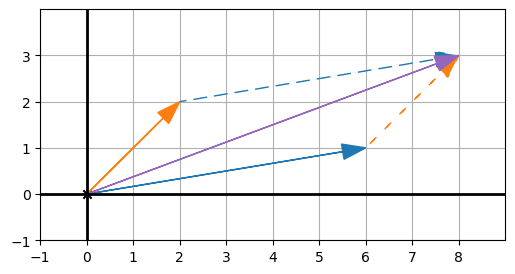

In [7]:
from vec2d.graph import draw, Arrow, Colors, LineStyles
from vec2d.math import add

u = (6, 1)
v = (2, 2)


draw(
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
    Arrow(add(u, v), u, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(add(u, v), v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(add(u, v), color=Colors.PURPLE),
)

The question we want to ask is:
> if we apply the same vector transformations to the three vectors, will it still look like a vector sum?

Let's try to see that geometrically, applying a certain counterclockwise rotation to the three vectors:

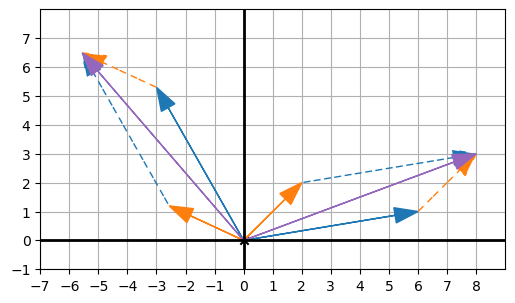

In [2]:
from vec2d.graph import draw, Arrow, Colors, LineStyles
from vec2d.math import add, rotate, to_radians

u = (6, 1)
v = (2, 2)
w = add(u, v)

r_u, r_v, r_w = rotate(to_radians(110), [u, v, w])


draw(
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
    Arrow(w, u, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(w, v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(w, color=Colors.PURPLE),
    Arrow(r_u, color=Colors.BLUE),
    Arrow(r_v, color=Colors.ORANGE),
    Arrow(r_w, r_u, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(r_w, r_v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(r_w, color=Colors.PURPLE),
)

Note how the rotated diagram is exactly the diagram representing the vector sum.

Thus, if we denote the rotation of the vector $ u $, as $ R(u) $, 

$
R(u) + R(v) = R(w)
$

provided that $ u + v = w $.

To describe this property, we say that rotations *preserve* vector sums.

Similarly, rotations preserve scalar multiples.

That is, if $ \vec{v} $ is a vector and $ s \vec{v} $ is the result of the scalar multiplication of $ \vec{v} $ by the scalar $ s $, we will see that if we rotate $ \vec{v} $ and $ s \vec{v} $, $ R(s \vec{v}) $ is a scalar multiple of $ R(\vec{v}) $ by the same factor $ s $:

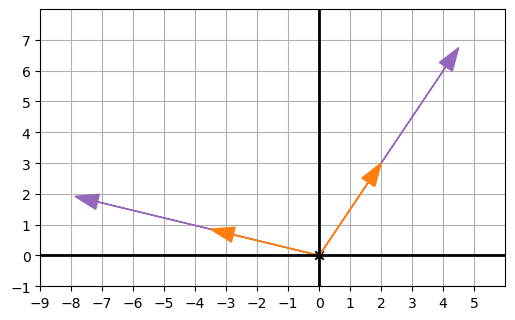

In [9]:
from vec2d.graph import draw, Arrow, Colors
from vec2d.math import scalar_product, rotate, to_radians

v = (2, 3)
s = 2.25
sv = scalar_product(v, s)
r_v, r_sv = rotate(to_radians(110), [v, sv])

draw(
    Arrow(sv, color=Colors.PURPLE),
    Arrow(v, color=Colors.ORANGE),
    Arrow(r_sv, color=Colors.PURPLE),
    Arrow(r_v, color=Colors.ORANGE),
)

While this is just a visual example, you'll find that for any vector $ \vec{v} $, scalar $ s $, and rotation $ R $, the same picture holds:

$
R(s\vec{v}) = s R (\vec{v})
$

Rotations or any other vector transformations that preserve vector sums and scalar multiples are called **linear transformations**.

Let's define this concept in more rigorous terms.

### Linear Transformation (Algebraic definition)

A **linear transformation** is a **vector transformation** $ T $ that **preserves vector addition** and **scalar multiplication**.

That is, for any input vectors $ \vec{u} $ and $ \vec{v} $, we have

$
T(\vec{u}) + T(\vec{v}) = T(\vec{u} + \vec{v})
$

and for any pair of scalar $ s $ and vector $ \vec{v} $, we have

$
T(s \vec{v}) = sT(\vec{v})
$


| NOTE: |
| :---- |
| Linear transformations are so important that the whole subject of linear algebra is named after them. |

### Picturing Linear Transformations

Not all transformations are linear transformations.

Let's consider a sample transformation $ S $ such that given a vector $ \vec{v} = (x, y) $, $ S(v) = (x^2, y^2) $.

Let's see if $ S $ is a linear transformation:


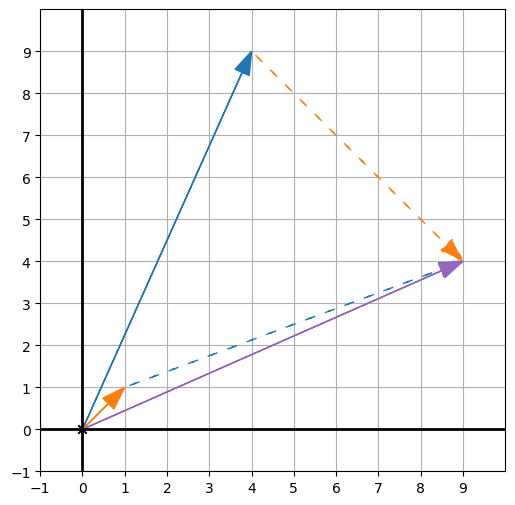

In [17]:
from vec2d.graph import draw, Arrow, Colors, LineStyles
from vec2d.math import add

u = (2, 3)
v = (1, -1)
w = add(u, v)

def s_transform(v):
    return tuple(coord ** 2 for coord in v)

s_u = s_transform(u)
s_v = s_transform(v)
s_w = s_transform(w)


draw(
    # Arrow(u, color=Colors.BLUE),
    # Arrow(v, color=Colors.ORANGE),
    # Arrow(w, u, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    # Arrow(w, v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    # Arrow(w, color=Colors.PURPLE),
    Arrow(s_u, color=Colors.BLUE),
    Arrow(s_v, color=Colors.ORANGE),
    Arrow(s_w, s_u, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(s_w, s_v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(s_w, color=Colors.PURPLE),
)

We clearly see that the transformed vectors do not seem to agree geometrically with what we should expect from a linear transformation.

We can also see that algebraically:

$
u = (2, 3) \\
v = (1, -1) \\
u + v = (3, 2) \\
S(u) = (4, 9) \\
S(v) = (1, 1) \\
S(u + v) = S((3, 2)) = (9, 4) \ne (4, 9) + (1, 1) = S(u) + S(v)
$

It doesn't preserve scalar multiples either:

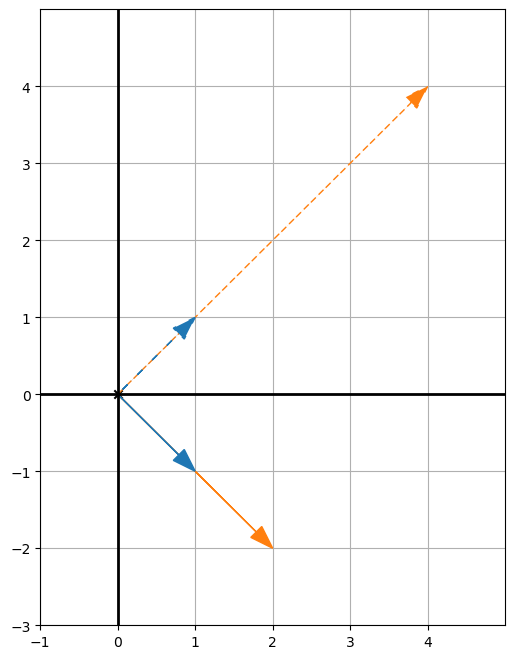

In [18]:
from vec2d.graph import draw, Arrow, Colors, LineStyles
from vec2d.math import scalar_product

v = (1, -1)
s = 2
sv = scalar_product(v, s)

def s_transform(v):
    return tuple(coord ** 2 for coord in v)


s_v = s_transform(v)
s_sv = s_transform(sv)


draw(
    Arrow(sv, color=Colors.ORANGE),
    Arrow(v, color=Colors.BLUE),
    Arrow(s_sv, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(s_v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
)

And also algebraically:

$
v = (1, -1) \\
s = 2 \\
s \vec{v} = (2, -2) \\
S(v) = (1, 1) \\
S(s\vec{v}) = S((2, -2)) = (4, 4) \ne 2 \cdot (2, -2) = s \cdot S(v)
$

Let's consider another transformation $ D(v) $ that scales the input vector by a factor of 2. That is, $ D(\vec{v}) = 2 \cdot \vec{v} $.

$
u = (u_x, u_y) \\
v = (v_x, v_y) \\
u + v = (u_x + v_x, u_y + v_y) \\
D(u) = (2 \cdot u_x, 2 \cdot u_y) \\
D(v) = (2 \cdot v_x, 2 \cdot v_y) \\
D(u + v) = (2 \cdot u_x + 2 \cdot v_x, 2 \cdot u_y + 2 \cdot u_y) = 2 \cdot (u_x + v_x, u_y + v_y) = 2 \cdot D(u) + D(v) \\
$

Thus, doubling the lengths preserves the sums.

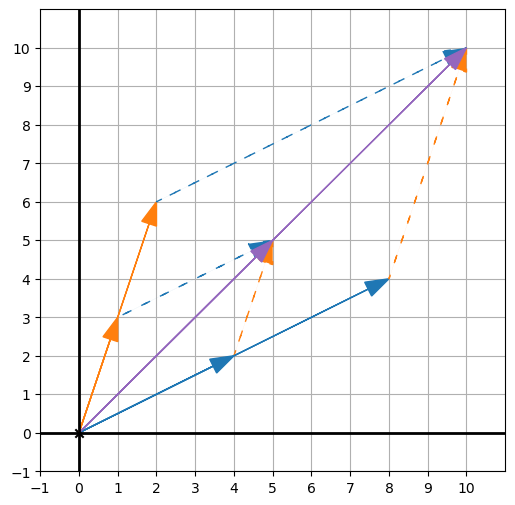

In [20]:
from vec2d.graph import draw, Arrow, Colors, LineStyles
from vec2d.math import add, scalar_product

u = (4, 2)
v = (1, 3)
w = add(u, v)

def d_transform(v):
    return scalar_product(v, 2)

d_u = d_transform(u)
d_v = d_transform(v)
d_w = d_transform(w)


draw(
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
    Arrow(w, u, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(w, v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(w, color=Colors.PURPLE),
    Arrow(d_u, color=Colors.BLUE),
    Arrow(d_v, color=Colors.ORANGE),
    Arrow(d_w, d_u, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(d_w, d_v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(d_w, color=Colors.PURPLE),
)

$ D $ also preserves the scalar multiplication:

$
v = (x, y) \\
s \cdot u = (s \cdot x, s \cdot y) \\
D(v) = (2 \cdot x, 2 \cdot y) \\
D(s \cdot v) = (2 \cdot x, 2 \cdot y) = 2 \cdot (x, y) = 2 \cdot D(v) \\
$

Surprisingly, translation is not a linear transformation, because in general $ B(v + w) \ne B(v) + B(w) $.

It turns out that for a transformation to be linear, it must not move the origin, but a translation by any non-zero vector transforms (moves) the origin, which will end up at a different point, and therefore will break the rules for linear transformations.

### Why Linear Transformations?

Because linear transformations preserve vector sums and scalar multiples, they also preserve a broader class of vector arithmetic operations.

The most general operation is called a **linear combination**.

A **linear combination** of a collection of vectors is a sum of scalar multiples of them.

For example, a linear combination of two vectors $ u $ and $ v $ would be $ 3 \cdot u - 2 \cdot v $.

Given three vectors $ u $, $ v $, and $ w $ a linear combination will be $ 0.5 \cdot u - v + 6 \cdot w $.

> Because linear transformations preserve vector sums and scalar multiples, they preserve linear combinations as well.

In more formal terms, if you have a collection of n vectors $ \vec{v_1} $, $ \vec{v_2} $, ..., $ \vec{v_n} $, as well as any choice of $ n $ scalars $ s_1 $,  $ s_2 $, ..., $ s_n $, a linear transformation $ T $ preserves the linear combination so that:

$
T(s_1 \cdot \vec{v_1} + s_2 \cdot \vec{v_2} + ... + s_n \cdot \vec{v_n}) = \
s_1 \cdot T(\vec{v_1}) + s_2 \cdot T(\vec{v_2}) + ... + s_n \cdot T(\vec{v_n})
$

One linear combination we've already worked with in a previous chapter was:

$
\frac{1}{2}(\vec{u} + \vec{v}) = \frac{1}{2} \cdot \vec{u} + \frac{1}{2} \cdot \vec{v}
$

Geometrically, this linear combination gives us a vector that identifies the midpoint between the segment that goes from the tip of $ \vec{u} $ to the tip of $ \vec{v} $.

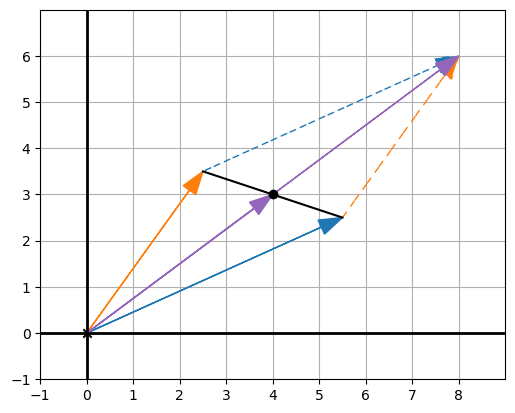

In [5]:
from vec2d.graph import draw, Arrow, Segment, Colors, LineStyles, Points
from vec2d.math import add, scalar_product

u = (5.5, 2.5)
v = (2.5, 3.5)


draw(
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
    Arrow(add(u, v), u, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(add(u, v), v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(add(u, v), color=Colors.PURPLE),
    Arrow(scalar_product(add(u, v), 1 / 2), color=Colors.PURPLE),
    Points(scalar_product(add(u, v), 1 / 2)),
    Segment(u, v, color=Colors.BLACK),
)

And annotated:

![Midpoint: linear combination](pics/midpoint_linear_combination.png)

Because linear transformations preserve linear combinations we can say:
> Linear transformations send midpoints to other midpoints.

That is, for any linear transformation $ T $

$
T(\frac{1}{2} \cdot (\vec{u} + \vec{v})) = \frac{1}{2} \cdot T(\vec{u}) + \frac{1}{2} \cdot T(\vec{v})
$

For example, if make $ T $ a rotation:

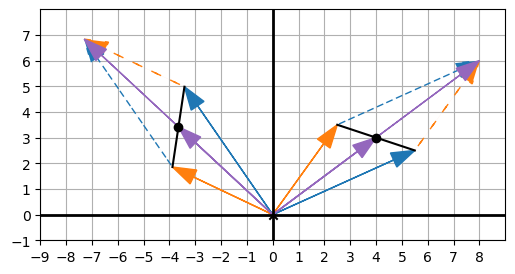

In [13]:
from vec2d.graph import draw, Arrow, Colors, LineStyles, Segment, Points
from vec2d.math import add, rotate, to_radians, scalar_product

u = (5.5, 2.5)
v = (2.5, 3.5)
w = add(u, v)

r_u, r_v, r_w = rotate(to_radians(100), [u, v, w])


draw(
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
    Arrow(w, u, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(w, v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(w, color=Colors.PURPLE),
    Arrow(scalar_product(w, 1 / 2), color=Colors.PURPLE),
    Points(scalar_product(w, 1 / 2)),
    Segment(u, v, color=Colors.BLACK),
    Arrow(r_u, color=Colors.BLUE),
    Arrow(r_v, color=Colors.ORANGE),
    Arrow(r_w, r_u, color=Colors.ORANGE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(r_w, r_v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(r_w, color=Colors.PURPLE),
    Arrow(scalar_product(r_w, 1 / 2), color=Colors.PURPLE),
    Points(scalar_product(r_w, 1 / 2)),
    Segment(r_u, r_v, color=Colors.BLACK),
)

The linear combination $ 0.25 \cdot \vec{u} + 0.75 \cdot \vec{v} $ also lies on the line segment between $ \vec{u} $ and $ \vec{v} $. Specifically, this is the point that lies 75% of the way from $ \vec{u} $ to $ \vec{v} $.

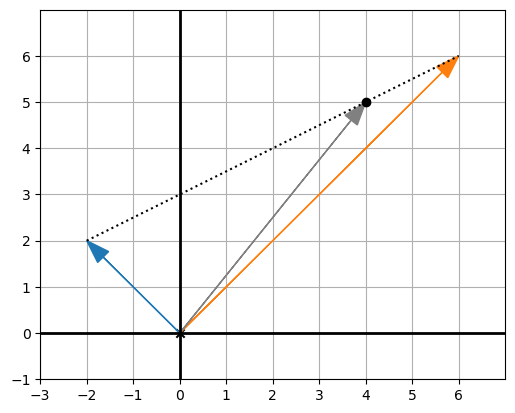

In [14]:
from vec2d.graph import draw, Arrow, Segment, Colors, LineStyles, Points
from vec2d.math import add, scalar_product

u = (-2, 2)
v = (6, 6)
w = add(scalar_product(u, 0.25), scalar_product(v, 0.75))

draw(
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
    Arrow(w, color=Colors.GRAY),
    Points(w),
    Segment(u, v, color=Colors.BLACK, linestyle=LineStyles.DOTTED),
)

And annotated for clarity:

![Linear Combination: Annotated](pics/linear_combination_annotated.png)

As a matter of fact, every point on the line segment between two vectors is a *weighted average*, having the form $ s \cdot \vec{u} + (1 - s) \cdot \vec{v} $, for any $ s $ between $ 0 $ and $ 1 $.

The following diagram shows this fact geometrically, by plotting 10 `Points` showing 10 values of $ s $ ranging from $ 0 $ to $ 1 $.

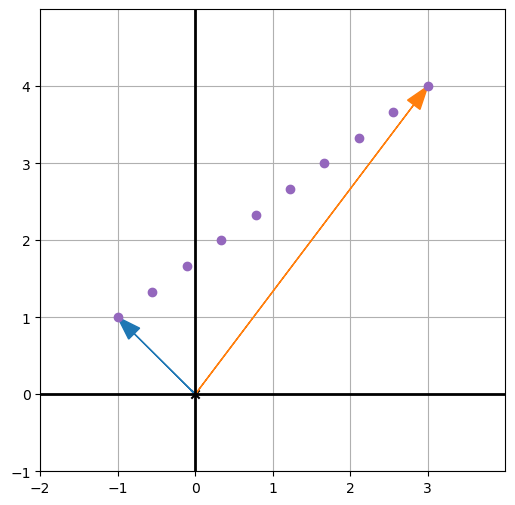

In [15]:
from vec2d.graph import draw, Arrow, Colors, Points
from vec2d.math import add, scalar_product
import numpy as np

u = (-1, 1)
v = (3, 4)
ss = np.linspace(start=0, stop=1, num=10, endpoint=True)

points = [add(scalar_product(u, (1 - s)), scalar_product(v, s)) for s in ss]

draw(
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
    Points(*points, color=Colors.PURPLE),
)

And the same exercise, but using 100 values:

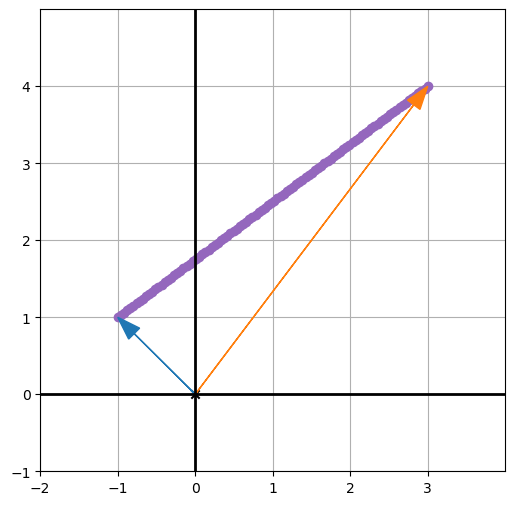

In [19]:
from vec2d.graph import draw, Arrow, Colors, Points
from vec2d.math import add, scalar_product
import numpy as np

u = (-1, 1)
v = (3, 4)
ss = np.linspace(start=0, stop=1, num=100, endpoint=True)

points = [add(scalar_product(u, (1 - s)), scalar_product(v, s)) for s in ss]

draw(
    Points(*points, color=Colors.PURPLE),
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
)

In summary, 
> every point on the line segment connecting two vectors $ \vec{u} $ and $ \vec{v} $, is a *weighted average* written as a linear combination $ s \cdot \vec{u} + (1 - s) \cdot \vec{v} $, for any $ s $ between $ 0 $ and $ 1 $.

Now we can start thinking about what a linear transformation does to a whole line segment.

A linear transformation $ T $, transforms $ \vec{u} $ and $ \vec{v} $ to some new vectors $ T(\vec{u}) $ and $ T(\vec{v}) $.

Because a linear transformation preserves linear combinations, we can write:

$
T( s \cdot \vec{u} + (1 - s) \cdot \vec{v}) = s \cdot T(\vec{u}) + (1 - s) \cdot T(\vec{v})
$

That is, a point in the segment between $ \vec{u} $ and $ \vec{v} $ is transformed into a new point that happens to lie in the segment between  $ T(\vec{u}) $ and $ T(\vec{u}) $.

Let's see this geometrically with a rotation transformation:


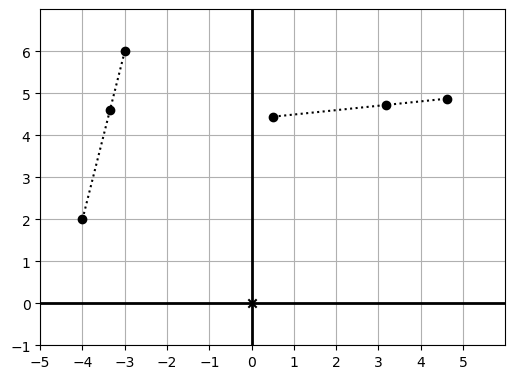

In [36]:
from vec2d.graph import draw, Points, Segment
from vec2d.math import add, scalar_product, rotate, to_radians

u = (-4, 2)
v = (-3, 6)

s = 0.35
w = add(scalar_product(u, s), scalar_product(v, 1 - s))

r_u, r_v, r_w = rotate(to_radians(290), [u, v, w])

draw(
    Segment(u, v, color=Colors.BLACK, linestyle=LineStyles.DOTTED),
    Points(u, v, w),
    Segment(r_u, r_v, color=Colors.BLACK, linestyle=LineStyles.DOTTED),
    Points(r_u, r_v, r_w),
)

assert round(r_w[0], 5) == round(add(scalar_product(r_u, s), scalar_product(r_v, 1 - s))[0], 5)
assert round(r_w[1], 5) == round(add(scalar_product(r_u, s), scalar_product(r_v, 1 - s))[1], 5)


And annotated for clarity:

![Annotated](pics/transformation-on-weighted-average.png)

A consequence that $ T $ takes every point on the line segment connecting $ \vec{u} $ and $ \vec{v} $ to a point on the line segment connecting $ T(\vec{u}) $ and $ T(\vec{v}) $.

Because our 3D models are made up of polygons and polygons are outlined by segments, we can confirm that linear transformations can be expected to preserve the structure of our 3D models (to some extent.)

For example, consider the following triangle on the x- and y- positive side of the chart. By applying a 90° rotations, the structure of the triangle stays the same on the x- negative, y+ quadrant of the chart:

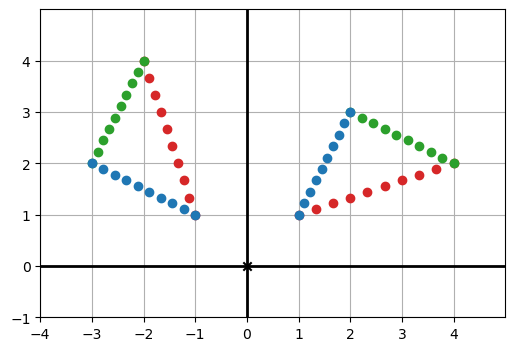

In [44]:
from vec2d.graph import draw, Colors, Points
from vec2d.math import add, scalar_product, rotate, to_radians
import numpy as np

a = (1, 1)
b = (4, 2)
c = (2, 3)
ss = np.linspace(start=0, stop=1, num=10, endpoint=True)

points_ab = [add(scalar_product(a, (1 - s)), scalar_product(b, s)) for s in ss]
points_bc = [add(scalar_product(b, (1 - s)), scalar_product(c, s)) for s in ss]
points_ca = [add(scalar_product(c, (1 - s)), scalar_product(a, s)) for s in ss]

r_points_ab = rotate(to_radians(90), points_ab)
r_points_bc = rotate(to_radians(90), points_bc)
r_points_ca = rotate(to_radians(90), points_ca)

draw(
    Points(*points_ab, color=Colors.RED),
    Points(*points_bc, color=Colors.GREEN),
    Points(*points_ca, color=Colors.BLUE),
    Points(*r_points_ab, color=Colors.RED),
    Points(*r_points_bc, color=Colors.GREEN),
    Points(*r_points_ca, color=Colors.BLUE),
)

By contrast, if we use a non-linear transformation such as $ S(\vec{v}) = (x^2, y^2) $, we will see that the structure of the triangle gets distorted.

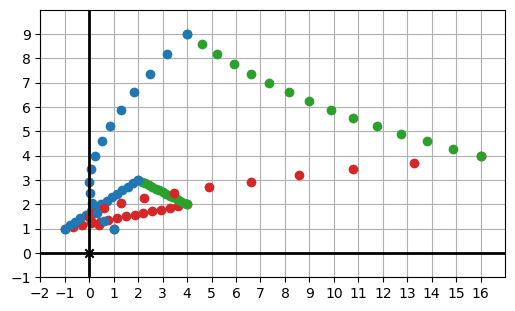

In [58]:
from vec2d.graph import draw, Colors, Points
from vec2d.math import add, scalar_product
import numpy as np

a = (-1, 1)
b = (4, 2)
c = (2, 3)
ss = np.linspace(start=0, stop=1, num=15, endpoint=True)


def s_transform(vectors):
    return [(x * x, y * y) for x, y in vectors]


points_ab = [add(scalar_product(a, (1 - s)), scalar_product(b, s)) for s in ss]
points_bc = [add(scalar_product(b, (1 - s)), scalar_product(c, s)) for s in ss]
points_ca = [add(scalar_product(c, (1 - s)), scalar_product(a, s)) for s in ss]

s_points_ab = s_transform(points_ab)
s_points_bc = s_transform(points_bc)
s_points_ca = s_transform(points_ca)

draw(
    Points(*points_ab, color=Colors.RED),
    Points(*points_bc, color=Colors.GREEN),
    Points(*points_ca, color=Colors.BLUE),
    Points(*s_points_ab, color=Colors.RED),
    Points(*s_points_bc, color=Colors.GREEN),
    Points(*s_points_ca, color=Colors.BLUE),
    # Points(*s_transform([a, b, c])),
)

It gets even more eviden if we choose the triangle designated by $ (2, 2) $, $ (2, 4) $, and $ (4, 1) $.

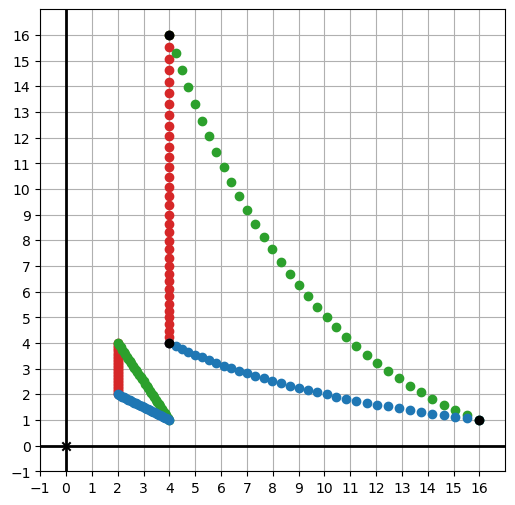

In [4]:
from vec2d.graph import draw, Colors, Points
from vec2d.math import add, scalar_product
import numpy as np

a = (2, 2)
b = (2, 4)
c = (4, 1)
ss = np.linspace(start=0, stop=1, num=35, endpoint=True)


def s_transform(vectors):
    return [(x * x, y * y) for x, y in vectors]


points_ab = [add(scalar_product(a, (1 - s)), scalar_product(b, s)) for s in ss]
points_bc = [add(scalar_product(b, (1 - s)), scalar_product(c, s)) for s in ss]
points_ca = [add(scalar_product(c, (1 - s)), scalar_product(a, s)) for s in ss]

s_points_ab = s_transform(points_ab)
s_points_bc = s_transform(points_bc)
s_points_ca = s_transform(points_ca)

draw(
    Points(*points_ab, color=Colors.RED),
    Points(*points_bc, color=Colors.GREEN),
    Points(*points_ca, color=Colors.BLUE),
    Points(*s_points_ab, color=Colors.RED),
    Points(*s_points_bc, color=Colors.GREEN),
    Points(*s_points_ca, color=Colors.BLUE),
    # Points(*s_transform([a, b, c])),
)

The importance of what we've seen in this section cannot be overstated:
> Linear transformations respect the algebraic properties of vectors, preserving sums, scalar multiples, and linear combinations.<br>They also respect the geometric properties of collections of vectors, sending line segments and polygons defined by vectors to new ones defined by the transformed vectors.

### Computing Linear Transformations

In the previous chapters, we saw how to break 2D and 3D vectors into components. For example:

$
(4, 3, 5) = (4, 0, 0) + (0, 3, 0) + (0, 0, 5)
$

This can be written as a linear combination of the *basis vectors*:

$
(4, 3, 5) = 4 \cdot (1, 0, 0) + 3 \cdot (0, 1, 0) + 5 \cdot (0, 0, 1)
$

As a matter of fact, any 3D vector can be decomposed into a linear combination of the vectors $ (1, 0, 0) $, $ (0, 1, 0) $, and $ (0, 0, 1) $.

The scalars appearing in such decomposition for a vector $ \vec{v} $ are exactly the coordinates of the vector.

The three vectors $ (1, 0, 0) $, $ (0, 1, 0) $, and $ (0, 0, 1) $ call the standard basis for the 3D space, and they are denoted as $ \vec{e_1} $, $ \vec{e_2} $, and $ \vec{e_3} $ (or sometimes as $ \vec{i} $, $ \vec{j} $, and $ \vec{k} $).

using the first notation, we could write:

$
(4, 3, 5) = 4 \cdot \vec{e_1} + 3 \cdot \vec{e_2} + 5 \cdot \vec{e_3}
$

On the 2D plane we can apply the same reasoning using $ \vec{e_1} = (1, 0) $ and $ \vec{e_2} = (0, 1) $ (or sometimes $ \vec{i} $ and $ \vec{j} $).

Similarly, any vector will be subject of being written using the standard basis:

$
(7, -4) = 7 \cdot \vec{e_1} - 4 \cdot \vec{e_2}
$

The beauty of being able to write any vector as a linear combination gives us an easy way to compute linear transformations.

Because linear transformations respect linear combinations:

$
T(x \cdot \vec{e_1} + y \cdot \vec{e_2} + z \cdot \vec{e_3}) =
x \cdot T(\vec{e_1}) + y \cdot T(\vec{e_2}) + z \cdot T(\vec{e_3})
$

All we need to know to compute a linear transformation is how it affects standard basis vectors.

That is, if we know $ T(\vec{e_1}) $ and $ T(\vec{e_2}) $, we will be able to compute $ T(\vec{v}) $ for any vector.

To make this more concrete, let's say that $ A $ is a linear transformation for which we know:

$
A(\vec{e_1}) = (1, 1, 1) \\
A(\vec{e_2}) = (1, 0, -1) \\
A(\vec{e_3}) = (0, 1, 1)
$

If $ v = (-1, 2, 2) $, we can calculate $ A(v) $ pretty easily.

$
v = -1 \cdot \vec{e_1} + 2 \cdot \vec{e_2} + 2 \cdot \vec{e3}
$

Thus,

$
A(v) = A(-1 \cdot \vec{e_1} + 2 \cdot \vec{e_2} + 2 \cdot \vec{e3}) \\
= -1 \cdot A(\vec{e_1}) + 2 \cdot A(\vec{e_2}) + 2 \cdot A(\vec{e_3}) \\
= -1 \cdot (1, 1, 1) + 2 \cdot (1, 0, -1) + 2 \cdot (0, 1, 1) \\
= (1, 1, -1)
$

And we can apply it to the teapot:

In [60]:
from rendergl import load_triangles, polygon_map, draw_model
from vec3d.math import add, scale

a_transform_e1 = (1, 1, 1)
a_transform_e2 = (1, 0, -1)
a_transform_e3 = (0, 1, 1)

def a_transform(v):
    x, y, z = v
    return add(
        scale(x, a_transform_e1),
        scale(y, a_transform_e2),
        scale(z, a_transform_e3),
    )

draw_model(polygon_map(a_transform, load_triangles()))

shm_open() failed: No such file or directory
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2675:(snd_pcm_open_noupdate) Unknown PCM default


SystemExit: 0

/home/ubuntu/miniconda3/envs/gl3d/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Which results in:

![Linear combination using standard basis](pics/teapot_linear_combination_std_basis.png)

From the computation perspective we see:

+ a linear transformation in 2D is defined by 2x2 numbers in total.
+ a linear transformation in 3D is defined by 3x3 numbers in total.
...
+ a linear transformation in a space with n dimensions will be defined by nxn numbers in total.

We start to see how arrangements of numbers in rows and columns (matrices) might be helpful to represent and compute transformations.

### Exercises

Consider $ S $ the vector transformation that squares all coordinates. Show algebraically that $ S(s \cdot \vec{v}) = s \cdot S(\vec{v}) $ does not hold for all choices of scalars $ s $ and 2D vectors $ \vec{v} $.

We need to demostrate that:

$
S(s \cdot \vec{v}) \ne s \cdot S(\vec{v})
$

for one choice of $ s $ and $ \vec{v} $ to demonstrate that it doesn't hold for all.



Thus, let's assume $ \vec{v} = (x, y) $ and $ s = -a $, with $ a > 0 $.

Then,

$
S(-a \cdot \vec{v}) = S(-a \cdot (x, y)) = S((-a \cdot x, -a \cdot y)) \\
= ((-a \cdot x)^2, (-a \cdot y)^2) = ((-a)^2 \cdot x^2, (-a)^2 \cdot y^2) \\
= (a^2 \cdot x^2, a^2 \cdot y^2)
$

By contrast:
$
-a \cdot S(\vec{v}) = -a \cdot S(x, y) = -a \cdot (x^2,  y^2) = \\
= (-a \cdot x^2, -a \cdot y^2)
$

And we can find values that dot not hold for:

$
(a^2 \cdot x^2, a^2 \cdot y^2) = (-a \cdot x^2, -a \cdot y^2)
$
for $ a > 0 $.

For example, $ a = 1 $, $ x = 1 $, $ y = 1 $:

$
(1, 1) \ne (-1, -1)
$

This demonstrates that $ S $ is not a linear transformation.

Similarly:

$
(s^2 \cdot x^2, s^2 \cdot y^2) = s \cdot (x^2, y^2)
$

does not hold either for $ s = 2 $ and $ (x, y) = (1, 1) $.

$
(4 \cdot 1, 4 \cdot 1) = 2 \cdot (1^2, 1^2)
$


### Exercise

Suppose $ T $ is a vector transformation and $ T(\vec{0}) \ne \vec{0} $, where $ \vec{0} $ represents the vector with all coordinates equal to zero. Why is $ T $ not linear according to the definition?

As for any vector $ \vec{v} = \vec{v} + \vec{0} $.

To preserve vector addition:

$
T(\vec{v}) = T(\vec{v} + \vec{0}) = T(\vec{v}) + T(\vec{0}) \\
\Rightarrow T(\vec{v}) - T(\vec{v}) = T(\vec{0}) \\
\Rightarrow \vec{0} = T(\vec{0})
$

Given that $ T(\vec{0}) \ne \vec{0} $, $ T $ cannot be linear.

### Exercise

The *identity* transformation is the vector transformation that returns the same vector it is passed. It is denoted as $ I $, so that $ I(\vec{v}) = \vec{v} $ for any vector $ \vec{v} $.

Explain why $ I $ is a linear transformation.

A linear transformation should preserve linear combinations, that is:

$
I(s_1 \cdot \vec{v_1} + s_2 \cdot \vec{v_2}) = s_1 \cdot I(\vec{v_1}) + s_2 \cdot I(\vec{v_2})
$

But, because of the definition of the *identity transformation* $ I(\vec{v}) = \vec{v} $.


Thus,

$
I(s_1 \cdot \vec{v_1} + s_2 \cdot \vec{v_2}) = s_1 \cdot \vec{v_1} + s_2 \cdot \vec{v_2} = s_1 \cdot I(\vec{v_1}) + s_2 \cdot I(\vec{v_2})
$



### Exercise

What is the midpoint between $ (5, 3) $ and $ (-2, 1) $. Plot all three of these points to see that you are correct.

We've seen that the midpoint between two vectors $ u $ and $ v $ can be computed as the following linear combination:

$
\vec{midpoint} = \frac{1}{2} \cdot \vec{u} + \frac{1}{2} \cdot \vec{v}
$

Thus,

$
\vec{midpoint} = \frac{1}{2} \cdot (5, 3) + \frac{1}{2} \cdot (-2, 1) \\
= (\frac{5}{2}, \frac{3}{2}) + (\frac{-2}{2}, \frac{1}{2}) \\
= (\frac{5 - 2}{2}, \frac{3 + 1}{2}) \\
= (\frac{3}{2}, 2)
$

Let's confirm this using a plot:

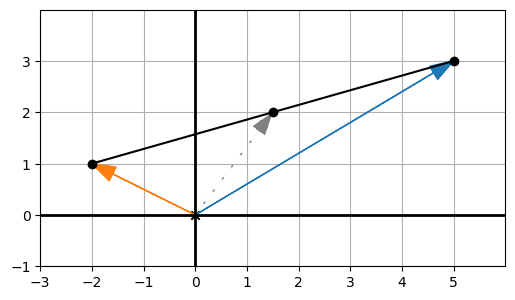

In [3]:
from vec2d.graph import draw, Points, Segment, Arrow, Colors, LineStyles

u = (5, 3)
v = (-2, 1)
midpoint = (3 / 2, 2)

draw(
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.ORANGE),
    Arrow(midpoint, color=Colors.GRAY, linestyle=LineStyles.LOOSELY_DOTTED),
    Segment(u, v, color=Colors.BLACK),
    Points(u, v, midpoint),
)

### Exercise

Consider the linear transformation $ S(\vec{v}) $ that sends a vector $ v = (x, y) $ to $ (x^2, y^2) $.

Plot all 36 vectors $ V $ with integer coordinates 0 to 5 as points, and then plot $ S(v) $ for each of them. What happens geometrically to the vectors under the action of $ S $?

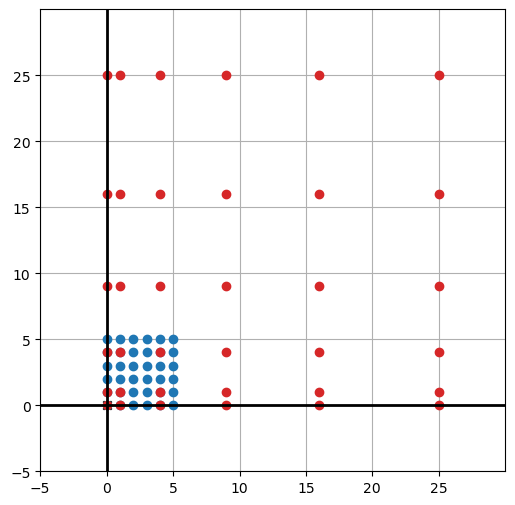

In [9]:
from vec2d.graph import draw, Points, Colors

vs = [(x, y) for x in range(0, 6) for y in range(0, 6)]

def s_transform(v):
    return tuple(coord * coord for coord in v)

s_vs = [s_transform(v) for v in vs]

draw(
    Points(*vs, color=Colors.BLUE),
    Points(*s_vs, color=Colors.RED),
    grid=(5, 5),
)

While the original vectors are uniformly spaced, when applying the transformation the spacing varies between points, even on the same line.

### Exercise

Property-based testing is a type of unit testing that involves inventing arbitrary input data for a program and then checking that the outputs satisfy desired conditions. There are popular Python libraries like Hypothesis that you can use to do that.

Implement property-based tests that check if a vector transformation is linear.

Specifically, given a vector transformation $ T $ implemented as a Python function, generate a large number of pairs of random vectors and assert for all of those that their sum is preserved by T. Then, do the same thing for pairs of scalar and a vector and ensure that $ T $ preserves scalar multiples.

You should find that linear transformations like `rotate_x_by(pi / 2)` pass the test, but the $ S((x, y)) = (x^2, y^2) $ shouldn't pass.

Let's do this for rotate:

In [45]:
from random import uniform
from math import pi, isclose
from vec3d.math import add, scale
from rendergl import rotate_x_by


def get_random_float():
    large_num = 1e50
    return uniform(-large_num, large_num)

num_samples = 1_000
random_us = [(get_random_float(), get_random_float(), get_random_float()) for _ in range(num_samples)]
random_vs = [(get_random_float(), get_random_float(), get_random_float()) for _ in range(num_samples)]
random_ss = [get_random_float() for _ in range(num_samples)]


def is_vectors_equal(u, v):
    if len(u) != len(v):
        return False
    else:
        for coord_u, coord_v in zip(u, v):
            return isclose(coord_u, coord_v)

def is_preserving_vector_addition(transform, us, vs):
    for u in us:
        for v in vs:
            if not is_vectors_equal(transform(add(u, v)), add(transform(u), transform(v))):
                print("The transform does not preserve vector addition:")
                print(f"\ttransform(add(u, v)) = {transform(add(u, v))}")
                print(f"\tadd(transform(u), transform(v) = {add(transform(u), transform(v))}")
                return
    print("The transform seems to preserve vector addition")


def is_preserving_scalar_multiples(transform, ss, us):
    for s in ss:
        for u in us:
            if not is_vectors_equal(transform(scale(s, u)), scale(s ,transform(u))):
                print("The transform does not preserve scalar multiples:")
                print(f"\ttransform(scale(s, u)) = {transform(scale(s, u))}")
                print(f"\ts * transform(u) = {scale(s ,transform(u))}")
                return
    print("The transform seems to preserve scalar multiples")


is_preserving_vector_addition(rotate_x_by(pi / 2), random_us, random_vs)
is_preserving_scalar_multiples(rotate_x_by(pi / 2), random_ss, random_us)



The transform seems to preserve vector addition
The transform seems to preserve scalar multiples


And now for the $ S((x, y)) = (x^2, y^2) $

In [46]:
from random import uniform
from math import isclose
from vec3d.math import add, scale



def get_random_float():
    large_num = 1e50
    return uniform(-large_num, large_num)

num_samples = 1_000
random_us = [(get_random_float(), get_random_float(), get_random_float()) for _ in range(num_samples)]
random_vs = [(get_random_float(), get_random_float(), get_random_float()) for _ in range(num_samples)]
random_ss = [get_random_float() for _ in range(num_samples)]


def is_vectors_equal(u, v):
    if len(u) != len(v):
        return False
    else:
        for coord_u, coord_v in zip(u, v):
            return isclose(coord_u, coord_v)

def is_preserving_vector_addition(transform, us, vs):
    for u in us:
        for v in vs:
            if not is_vectors_equal(transform(add(u, v)), add(transform(u), transform(v))):
                print("The transform does not preserve vector addition:")
                print(f"\ttransform(add(u, v)) = {transform(add(u, v))}")
                print(f"\tadd(transform(u), transform(v) = {add(transform(u), transform(v))}")
                return
    print("The transform seems to preserve vector addition")


def is_preserving_scalar_multiples(transform, ss, us):
    for s in ss:
        for u in us:
            if not is_vectors_equal(transform(scale(s, u)), scale(s ,transform(u))):
                print("The transform does not preserve scalar multiples:")
                print(f"\ttransform(scale(s, u)) = {transform(scale(s, u))}")
                print(f"\ts * transform(u) = {scale(s ,transform(u))}")
                return
    print("The transform seems to preserve scalar multiples")


def s_transform(v):
    return tuple(coord * coord for coord in v)

is_preserving_vector_addition(s_transform, random_us, random_vs)
is_preserving_scalar_multiples(s_transform, random_ss, random_us)



The transform does not preserve vector addition:
	transform(add(u, v)) = (3.921319764961404e+99, 2.9287584200846876e+99, 2.7724106316124495e+100)
	add(transform(u), transform(v) = (5.612214143748722e+99, 4.506781675903684e+99, 1.4193606573798971e+100)
The transform does not preserve scalar multiples:
	transform(scale(s, u)) = (2.430885833020245e+198, 1.9352518510407349e+198, 2.1963697538840298e+198)
	s * transform(u) = (-1.1543693503423243e+149, -9.190046655786606e+148, -1.04300329182984e+149)


### Exercise

One 2D vector transformation is *reflection across the x-axis*. This transformation takes a vector and returns another one, which is the *mirror image* with respect to the x-axis. Its x-coordinate then should be unchanged, and its y-coordinate should change its sign.

Denoting this transformation as $ S_x $, the following picture shows $ v = (3, 2) $ and the transformed vector $ S_x(v) $.


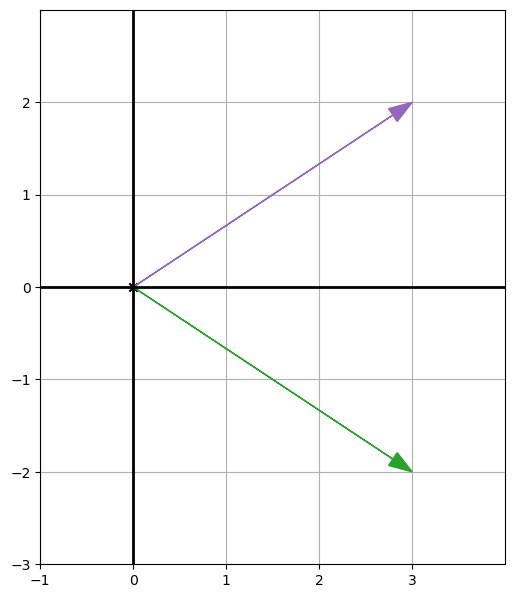

In [47]:
from vec2d.graph import draw, Arrow, Colors

v = (3, 2)

def sx_transform(v):
    x, y = v
    return (x, -y)

draw(
    Arrow(v, color=Colors.PURPLE),
    Arrow(sx_transform(v), color=Colors.GREEN),
)


Draw two vectors and their sum, as well as the reflection of these three vectors to demonstrate that this transformation preserves vector addition. Draw another diagram to show similarly that scalar multilication is preserved, thereby demonstrating both criteria for linearity.

Let's get a couple of vectors of the positive x- and y- quadrant, and start with the preservation of vector sums.

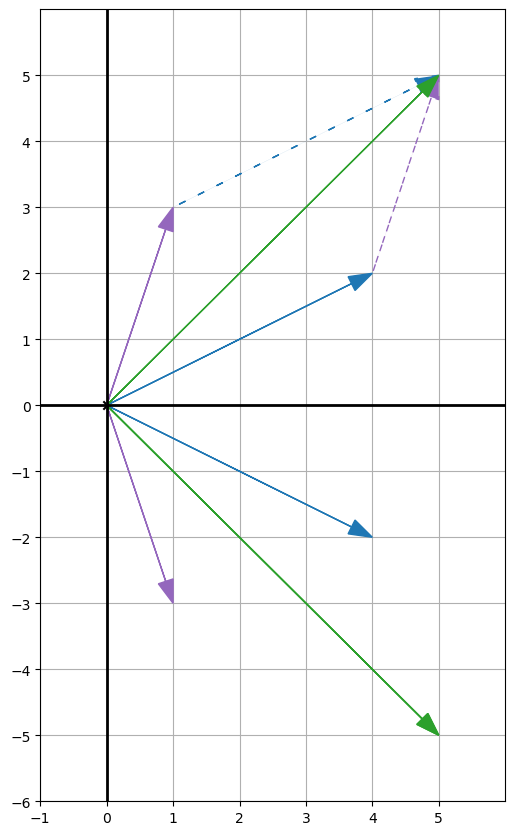

In [55]:
from vec3d.math import add, scale
from vec2d.graph import draw, Arrow, Colors, LineStyles

u = (4, 2)
v = (1, 3)

def reflection_across_x(v):
    x, y = v
    return (x, -y)

draw(
    Arrow(u, color=Colors.BLUE),
    Arrow(v, color=Colors.PURPLE),
    Arrow(add(u, v), u, color=Colors.PURPLE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(add(u, v), v, color=Colors.BLUE, linestyle=LineStyles.LOOSELY_DASHED),
    Arrow(add(u, v), color = Colors.GREEN),
    Arrow(reflection_across_x(u), color=Colors.BLUE),
    Arrow(reflection_across_x(v), color=Colors.PURPLE),
    Arrow(reflection_across_x(add(u, v)), color=Colors.GREEN),
    Arrow(add(reflection_across_x(u), reflection_across_x(v)), color=Colors.GREEN),
)

assert reflection_across_x(add(u, v)) == add(reflection_across_x(u), reflection_across_x(v))


Now we can do the same with the scalar multiples:

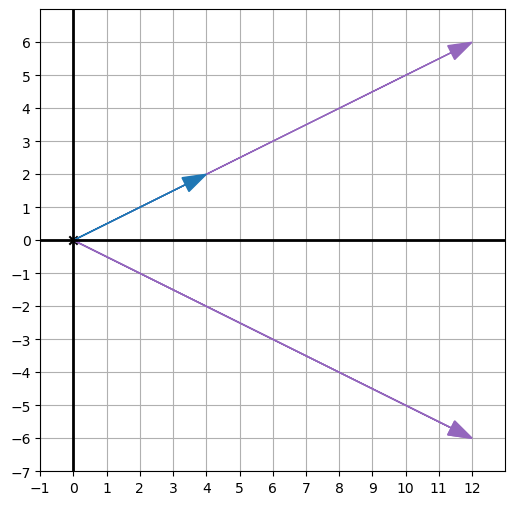

In [58]:
from vec3d.math import add, scale
from vec2d.graph import draw, Arrow, Colors

u = (4, 2)
s = 3

def reflection_across_x(v):
    x, y = v
    return (x, -y)

draw(
    Arrow(scale(s, u), color=Colors.PURPLE),
    Arrow(u, color=Colors.BLUE),
    Arrow(reflection_across_x(scale(s, u)), color=Colors.PURPLE),
    Arrow(scale(s, reflection_across_x(u)), color=Colors.PURPLE),
)

assert reflection_across_x(scale(s, u)) == scale(s, reflection_across_x(u))


### Exercise

Suppose $ S $ and $ T $ are both linear transformations. Explain why the composition of $ S $ and $ T $ is also linear.

Because $ S $ is a linear transformation:

$
S(s_1 \cdot \vec{u} + s_2 \cdot \vec{v}) = s_1 \cdot S(\vec{u}) + s_2 \cdot S(\vec{v})
$

Similarly, because $ T $ is a linear transformation:

$
T(s_1 \cdot \vec{u} + s_2 \cdot \vec{v}) = s_1 \cdot T(\vec{u}) + s_2 \cdot T(\vec{v})
$

Therefore,

$
S(T(s_1 \cdot \vec{u} + s_2 \cdot \vec{v})) \\
= S(s_1 \cdot T(\vec{u}) + s_2 \cdot T \vec{v}) \\
= s_1 \cdot S(T(\vec{u})) + s_2 \cdot S(T(\vec{v}))
$

Thus,

$
S(T(s_1 \cdot \vec{u} + s_2 \cdot \vec{v})) = s_1 \cdot S(T(\vec{u})) + s_2 \cdot S(T(\vec{v}))
$

and therefore, if $ S $ and $ T $ are linear transformation, their composition, denoted as $ S \circ T $ is also a linear transformation because it preserves linear combinations.

### Exercise

Let $ T $ be the linear transformation done by the Python function `rotate_x_by(pi / 2)`. What are $ T(\vec{e_1}) $, $ T(\vec{e_2}) $, and $ T(\vec{e_3}) $?

The function `rotate_x_by(pi / 2)` is a rotation of 90° about the x-axis.

If we bring to mind the OpenGL axis:

![OpenGL axis orientation](pics/opengl-axis-orientation.png)

We know that a rotation about x-axis will leave the x coordinate constant.

Thus:

$
e_1 = (1, 0, 0), T(e_1) = (1, 0, 0) = e_1 \\
e_2 = (0, 1, 0), T(e_2) = (0, 0, 1) = e_3 \\
e_3 = (0, 0, 1), T(e_3) = (0, -1, 0) = -e_2
$

Let's confirm that with Python

In [19]:
from math import pi, isclose
from rendergl import rotate_x_by
from vec3d.math import scale


e_1 = (1, 0, 0)
e_2 = (0, 1, 0)
e_3 = (0, 0, 1)

def is_vectors_close(u, v):
    return all([isclose(coord_u, coord_v, abs_tol=1e-15) for coord_u, coord_v in zip(u, v)])

assert is_vectors_close(rotate_x_by(pi / 2)(e_1), e_1)
assert is_vectors_close(rotate_x_by(pi / 2)(e_2), e_3)
assert is_vectors_close(rotate_x_by(pi /2 )(e_3), scale(-1, e_2))

| NOTE: |
| :---- |
| We have to define the `is_vectors_close` function because we're dealing with floating-point coordinates. |

### Exercise

Write a `linear_combination(scalars, *vectors)` that takes a list of scalars and the same number of vectors and returns a single vector.

For example, `linear_combination([1, 2, 3], (1, 0, 0), (0, 1, 0), (0, 0, 1)) = (1, 2, 3)`.

In [24]:
from vec3d.math import scale, add

def linear_combination(scalars, *vectors):
    return add(*[scale(s, v) for s, v in zip(scalars, vectors)])

assert linear_combination([1, 2, 3], (1, 0, 0), (0, 1, 0), (0, 0, 1)) == (1, 2, 3)

### Exercise

Write a function `transform_standard_basis(transform)` that takes a 3D vector transformation as an input and outputs the effect it has on the vectors of the standard basis.

It should output a tuple of 3 vectors that are the results of transform acting on $ e_1 $, $ e_2 $, and $ e_3 $, respectively.

In [28]:
from math import pi
from rendergl import rotate_x_by


def transform_standard_basis(transform):
    return transform((1, 0, 0)), transform((0, 1, 0)), transform((0, 0, 1))

rotate_90_deg_about_x = rotate_x_by(pi / 2)

transform_standard_basis(rotate_90_deg_about_x)

def is_vectors_close(u, v):
    return all([isclose(coord_u, coord_v, abs_tol=1e-15) for coord_u, coord_v in zip(u, v)])

assert is_vectors_close(rotate_90_deg_about_x((1, 0, 0)), (1, 0, 0))
assert is_vectors_close(rotate_90_deg_about_x((0, 1, 0)), (0, 0, 1))
assert is_vectors_close(rotate_90_deg_about_x((0, 0, 1)), (0, -1, 0))


| NOTE: |
| :---- |
| We have to define the `is_vectors_close` function because we're dealing with floating-point coordinates. |

### Exercise

Suppose $ B $ is a linear transformation, with $ B(\vec{e_1}) = (0, 0, 1) $, $ B(\vec{e_2}) = (2, 1, 0) $, $ B(\vec{e_3}) = (-1, 0, -1) $, and $ \vec{v} = (-1, 1, 2) $.

What is $ B(\vec{v}) $.

Because linear transformation preserves linear combinations, and any vector in the 3D space can be written as a linear combination of the vectors of the standard basis $ \vec{e_1} $, $ \vec{e_2} $, and $ \vec{e_3} $, we can do:

$
B(\vec{u}) = B(x \cdot \vec{e_1} + y \cdot \vec{e_2} + z \cdot \vec{e_3}) = x \cdot B(\vec{e_1}) + y \cdot B(\vec{e_2}) + z \cdot B(\vec{e_3}) 
$

Thus,

$
B(\vec{v}) = B((-1, 1, 2)) = -1 \cdot B(\vec{e_1}) + 1 \cdot B(\vec{e_2}) + 2 \cdot B(\vec{e_3}) \\
= -1 \cdot (0, 0, 1) + (2, 1, 0) + 2 \cdot (-1, 0, -1) = (0, 1, -3)
$


### Exercise

Suppose $ A $ and $ B $ are both linear transformations with $ A(\vec{e_1}) = (1, 1, 1) $, $ A(\vec{e_2}) = (1, 0, -1) $, and $ A(\vec{e_3}) = (0, 1, 1) $, and $ B(\vec{e_1}) = (0, 0, 1) $, $ B(\vec{e_2}) = (2, 1, 0) $, and $ B(\vec{e_3}) = (-1, 0, -1) $.

What is $ A(B(\vec{e_1})) $, $ A(B(\vec{e_2})) $, and $ A(B(\vec{e_3})) $?

Let's do it algebraically:

$
A(B(\vec{e_1})) = A((0, 0, 1)) = A(\vec{e_3}) = (0, 1, 1) 
$

For the second question:

$
A(B(\vec{e_2})) = A((2, 1, 0)) \\
= 2 \cdot A(\vec{e_1}) + A(\vec{e_2}) \\
= 2 \cdot (1, 1, 1) + (1, 0, -1) \\
=(3, 2, 1)
$

Finally:

$
A(B(\vec{e_3})) = A((-1, 0, -1)) \\
= -A(e_1) -A(e_3) \\
= (-1, -1, -1) + (0, -1, -1) = (-1, -2, -2)
$